I will be testing how to construct a Vandermonde matrix for a Fourier transformation of a given signal.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import interpolate


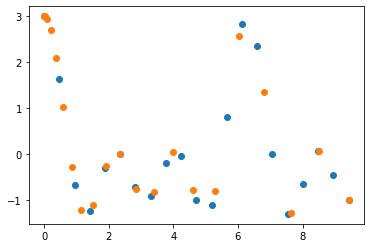

In [121]:
# construct equispaced and nonequispaced signals

def sig_gen(x):
    return np.cos(x) + np.cos(2*x) + np.cos(3*x)

x_eq = np.arange(21) * 3 * np.pi / 20
x_non = np.arange(21)**2 * 3 * np.pi / (20**2)

y_eq = sig_gen(x_eq)
y_non = sig_gen(x_non)

plt.scatter(x_eq, y_eq)
plt.scatter(x_non, y_non)

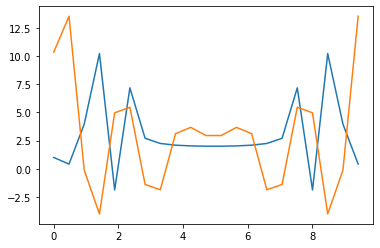

In [122]:
# do fft on points
fft_eq = np.fft.fft(y_eq)
fft_non = np.fft.fft(y_non)

plt.plot(x_eq, fft_eq)
plt.plot(x_eq, fft_non)

/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


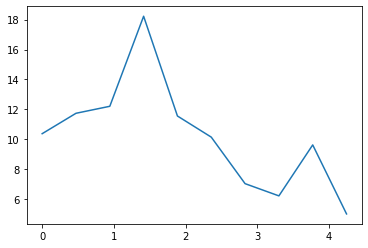

In [124]:
# construct a vandermonde matrix and apply it to signal

size = x_non.shape[0]
low_modes = 10
V = np.zeros((low_modes, size), dtype=np.cfloat)
for row in range(low_modes):
    for col in range(size):
        V[row, col] = np.exp(-1j * 2 * np.pi * row * x_non[col] / x_non[-1])
# V = V / np.sqrt(size)

vft_non = np.matmul(V, y_non)
# vft_non = vft_non - np.amin(vft_non)

plt.plot(x_eq[:low_modes], vft_non)

/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


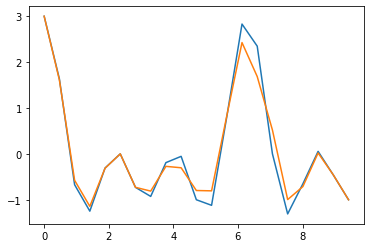

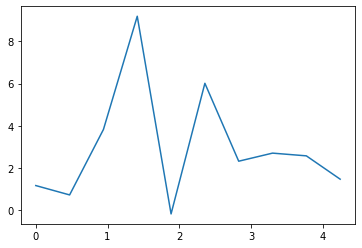

In [129]:
# Do interpolation on a signal and view fft

f_int = interpolate.interp1d(x_non, y_non, kind='linear')
y_int = f_int(x_eq)

plt.plot(x_eq, y_eq)
plt.plot(x_eq, y_int)
plt.figure()

fft_int = np.fft.fft(y_int)
plt.plot(x_eq[:10], fft_int[:10])

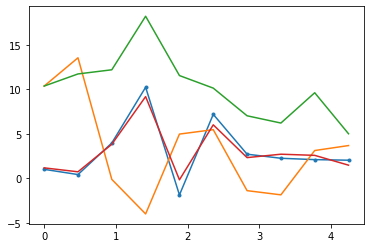

In [128]:

plt.plot(x_eq[:low_modes], fft_eq[:low_modes], marker='.')
plt.plot(x_eq[:low_modes], fft_non[:low_modes])
plt.plot(x_eq[:low_modes], vft_non)
plt.plot(x_eq[:low_modes], fft_int[:low_modes])